In [1]:
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib import style
from mplfinance.original_flavor import candlestick_ohlc
import mplfinance as mpf
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.dates as mdates
import pandas_datareader.data as web
import yfinance as yf

yf.pdr_override()

In [2]:
import numpy as np

In [3]:
style.use('ggplot')

start = dt.datetime(2019, 1, 1)
end = dt.datetime(2022, 10, 21)

data = yf.download("PINS", start=start, end=end)

print(data.head())
print("==================================================")
print(data.tail())

[*********************100%***********************]  1 of 1 completed
                                Open       High        Low      Close  \
Date                                                                    
2019-04-18 00:00:00-04:00  23.750000  25.180000  23.049999  24.400000   
2019-04-22 00:00:00-04:00  24.620001  25.680000  23.570000  24.990000   
2019-04-23 00:00:00-04:00  25.379999  27.750000  25.230000  25.850000   
2019-04-24 00:00:00-04:00  26.500000  27.030001  25.933001  26.799999   
2019-04-25 00:00:00-04:00  27.450001  29.400000  26.670000  28.799999   

                           Adj Close    Volume  
Date                                            
2019-04-18 00:00:00-04:00  24.400000  87109500  
2019-04-22 00:00:00-04:00  24.990000  19746800  
2019-04-23 00:00:00-04:00  25.850000  19245400  
2019-04-24 00:00:00-04:00  26.799999   9477200  
2019-04-25 00:00:00-04:00  28.799999  16648300  
                                Open       High        Low      Close  \
Dat

# Pinterest

In [4]:
data.to_csv('pint.csv')

In [5]:
#profile = ProfileReport(data, title="Pandas Profiling Report")
#profile

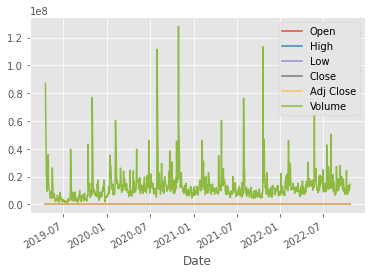

In [6]:
data.plot()
plt.show()

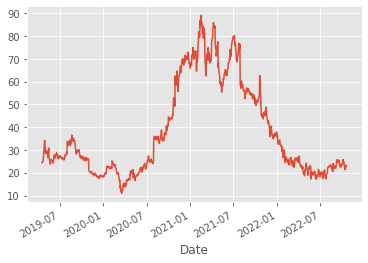

In [7]:
data['Adj Close'].plot()
plt.show()

In [8]:
data_copy = data.copy()
data_copy['100ma'] = data_copy['Adj Close'].rolling(window=100).mean()
print(data_copy.head())
print(data_copy.tail())

                                Open       High        Low      Close  \
Date                                                                    
2019-04-18 00:00:00-04:00  23.750000  25.180000  23.049999  24.400000   
2019-04-22 00:00:00-04:00  24.620001  25.680000  23.570000  24.990000   
2019-04-23 00:00:00-04:00  25.379999  27.750000  25.230000  25.850000   
2019-04-24 00:00:00-04:00  26.500000  27.030001  25.933001  26.799999   
2019-04-25 00:00:00-04:00  27.450001  29.400000  26.670000  28.799999   

                           Adj Close    Volume  100ma  
Date                                                   
2019-04-18 00:00:00-04:00  24.400000  87109500    NaN  
2019-04-22 00:00:00-04:00  24.990000  19746800    NaN  
2019-04-23 00:00:00-04:00  25.850000  19245400    NaN  
2019-04-24 00:00:00-04:00  26.799999   9477200    NaN  
2019-04-25 00:00:00-04:00  28.799999  16648300    NaN  
                                Open       High        Low      Close  \
Date                   

In [9]:
data_copy.dropna(inplace=True)
print(data_copy.head())

                                Open       High        Low      Close  \
Date                                                                    
2019-09-10 00:00:00-04:00  27.580000  29.129999  27.350000  28.799999   
2019-09-11 00:00:00-04:00  29.000000  29.760000  28.530001  29.600000   
2019-09-12 00:00:00-04:00  30.200001  30.370001  29.120001  29.770000   
2019-09-13 00:00:00-04:00  29.660000  30.049999  28.799999  29.040001   
2019-09-16 00:00:00-04:00  28.650000  29.830000  28.620001  29.260000   

                           Adj Close   Volume    100ma  
Date                                                    
2019-09-10 00:00:00-04:00  28.799999  6358200  28.8220  
2019-09-11 00:00:00-04:00  29.600000  4371800  28.8740  
2019-09-12 00:00:00-04:00  29.770000  4322400  28.9218  
2019-09-13 00:00:00-04:00  29.040001  2943100  28.9537  
2019-09-16 00:00:00-04:00  29.260000  2042700  28.9783  


In [10]:
data['100ma'] = data_copy['Adj Close'].rolling(window=100, min_periods = 0).mean()
print(data.head())

                                Open       High        Low      Close  \
Date                                                                    
2019-04-18 00:00:00-04:00  23.750000  25.180000  23.049999  24.400000   
2019-04-22 00:00:00-04:00  24.620001  25.680000  23.570000  24.990000   
2019-04-23 00:00:00-04:00  25.379999  27.750000  25.230000  25.850000   
2019-04-24 00:00:00-04:00  26.500000  27.030001  25.933001  26.799999   
2019-04-25 00:00:00-04:00  27.450001  29.400000  26.670000  28.799999   

                           Adj Close    Volume  100ma  
Date                                                   
2019-04-18 00:00:00-04:00  24.400000  87109500    NaN  
2019-04-22 00:00:00-04:00  24.990000  19746800    NaN  
2019-04-23 00:00:00-04:00  25.850000  19245400    NaN  
2019-04-24 00:00:00-04:00  26.799999   9477200    NaN  
2019-04-25 00:00:00-04:00  28.799999  16648300    NaN  


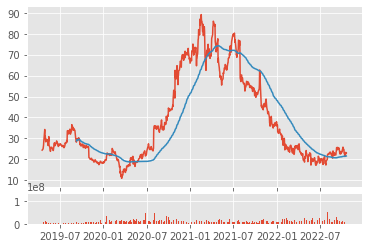

In [11]:
ax1 = plt.subplot2grid((6, 1), (0, 0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6, 1), (5, 0), rowspan = 1, colspan = 1, sharex = ax1)

ax1.plot(data.index, data['Adj Close'])
ax1.plot(data.index, data['100ma'])
ax2.bar(data.index, data['Volume'])

plt.show()

In [12]:
start = pd.Timestamp("2020-01-01 12:00:00", tz="America/New_York")
end = pd.Timestamp("2020-07-31 12:00:00", tz="America/New_York")

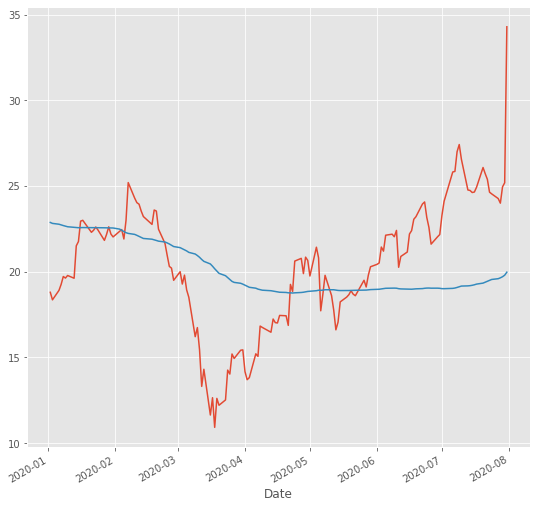

In [18]:
plt.figure(figsize=(9, 9))
data[(data.index > start) & (data.index < end)]['Adj Close'].plot()
data[(data.index > start) & (data.index < end)]['100ma'].plot()
plt.show()

Поглянувши ближче на частину графіку від 2020-01-01 до 2020-07-31, легко відслідковується патерн чашка. Чатина CUP знаходиться на початку 2020-02
та закунчужться 2020-05. Частина HANDLE знаходиться між 2020-05 та 2020-06, ціна акцій перетинає лінію тренду під кінець 2020-05, після цього ціна як і очікувалось зростає.

In [20]:
start = pd.Timestamp("2021-01-01 12:00:00", tz="America/New_York")
end = pd.Timestamp("2021-07-31 12:00:00", tz="America/New_York")

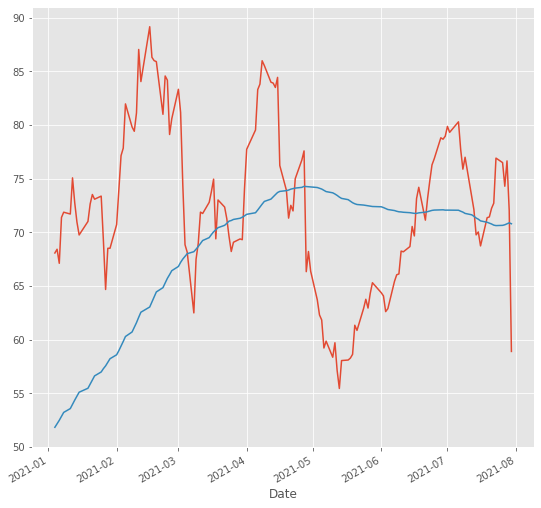

In [21]:
plt.figure(figsize=(9, 9))
data[(data.index > start) & (data.index < end)]['Adj Close'].plot()
data[(data.index > start) & (data.index < end)]['100ma'].plot()
plt.show()

Поглянувши ближче на частину графіку від 2021-01-01 до 2020-08-01, легко відслідковується патерн "Голова і плечі". Перший знаходиться на відрізку від 2021-03 до 2021-05, ліве плече знаходиться посередині між 2021-03 та 2021-04, голова знаходится на початку 2021-04, праве плече на прикінці 2021-04. Після правого плеча очікувано іде спад. Також на відрізку графіку від 2021-02 до 2021-03 напевно також знаходиться цей патерн.

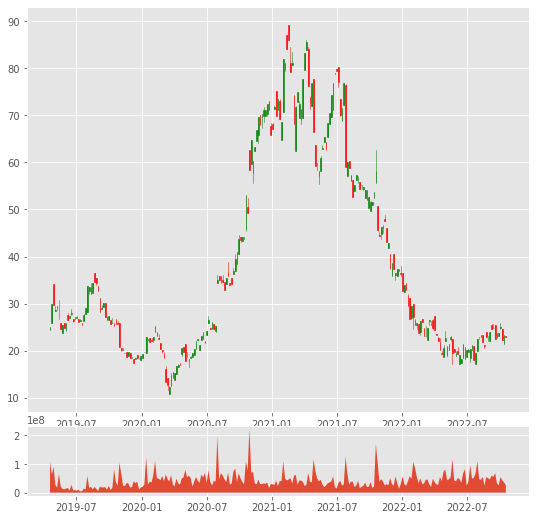

In [24]:
plt.figure(figsize=(9, 9))
data_ohlc = data['Adj Close'].resample('5D').ohlc()
data_volume = data['Volume'].resample('5D').sum()

data_ohlc.reset_index(inplace = True)
data_ohlc['Date'] = data_ohlc['Date'].map(mdates.date2num)

ax1 = plt.subplot2grid((6, 1), (0, 0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6, 1), (5, 0), rowspan = 1, colspan = 1, sharex = ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, data_ohlc.values, width = 2, colorup='g')
ax2.fill_between(data_volume.index.map(mdates.date2num), data_volume.values, 0)
plt.show()

# Висновки

Мною було проведено технічний аналіз ринкових даних на прикладі акцій компанії Pinterest. Побудовано графіки ціни та тренду за допомогою яких було знайдено приклади двох базових патернів. Робота з набором даних була реалізовна за допомогою бібліотеки pandas. Побудова графіків було реалізовано на matplotlib. Набір даних був отриманий з відкритих джерел за допомогою бібліотеку yfinance. В кінці було проведено маштабування даних до 5 дневного формату.